# 作業:
課程範例以 訓練資料集來檢視，先看一下測試資料特性，再把測試資料集和訓練資料集合併，並回答下列問題，   
目的:讓大家熟悉對應這樣的問題，我們要提取怎樣的函數來進行計算。   

* Q1: 觀察測試(test)資料集和訓練(Train)資料集的變數的差異性?
* Q2: 測試資料集是否有遺失值?
* Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形或數值來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   


In [275]:
#把需要的 library import 進來
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

In [ ]:
#顯示圖形的函數，可不先不用理解，直接用
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [226]:
# 把兩個訓練資料集和測試資料集讀進來
df_train = pd.read_csv("Titanic_train.csv")
df_test = pd.read_csv("Titanic_test.csv")


# Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?

In [219]:
# Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?
'''
暗示，可以用那些函數，來看出資料的欄位變數
'''
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

## A1 : Test 資料集沒有 'Survived'

# Q2: 測試資料集是否有遺失值?

In [144]:
#可以嘗試用範例的程式

#判斷每一個資料點，是否為空值:
print(df_test.isnull().head(5))


# 会判断哪些”列”存在缺失值
# any：判斷一個tuple或者list是否全為空，0，False。如果全為空，0，False，則返回False；如果不全為空，則返回True。
print(df_test.isnull().any())

# 統計 data 裡有空值的變數個數
print(df_test.isnull().any().sum())

   PassengerId  Pclass   Name    Sex  ...  Ticket   Fare  Cabin  Embarked
0        False   False  False  False  ...   False  False   True     False
1        False   False  False  False  ...   False  False   True     False
2        False   False  False  False  ...   False  False   True     False
3        False   False  False  False  ...   False  False   True     False
4        False   False  False  False  ...   False  False   True     False

[5 rows x 11 columns]
PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool
3


In [145]:
#可以只顯示存在缺失值的行列，清楚地確定缺失值的狀態
# 代表有缺時的地方才顯示df_train.isnull().values==True
df_test[df_test['Age'].isnull().values==True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [146]:
print(df_test['Age'].isnull().value_counts())
#Age 有86個遺失值

False    332
True      86
Name: Age, dtype: int64


In [147]:
df_test[df_test['Fare'].isnull().values==True]
#Fare 有1個遺失值

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [153]:
print(df_test['Fare'].isnull().value_counts())

False    417
True       1
Name: Fare, dtype: int64


In [149]:
df_test[df_test['Cabin'].isnull().values==True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [150]:
print(df_test['Cabin'].isnull().value_counts())
#Cabin 有327個遺失值

True     327
False     91
Name: Cabin, dtype: int64


## A2 : Test 資料集有遺失值， 'Age' 86個，Fare 有1個，'Cabin' 有327個遺失值

# Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   

In [292]:
#合併資料
df_train = pd.read_csv("Titanic_train.csv")
df_test = pd.read_csv("Titanic_test.csv")
data=df_train.append(df_test)

In [293]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [294]:
# 会判断哪些”列”存在缺失值
# any：判斷一個tuple或者list是否全為空，0，False。如果全為空，0，False，則返回False；如果不全為空，則返回True。
print(data.isnull().any())

# 統計 data 裡有空值的變數個數
print(data.isnull().any().sum())

PassengerId    False
Survived        True
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked        True
dtype: bool
5


In [295]:
# 遺失值數量
print("Cabin ...遺失%5d個值" %(data['Cabin'].isnull().sum()))
print("Age .....遺失%5d個值" %(data['Age'].isnull().sum()))
print("Fare ....遺失%5d個值" %(data['Fare'].isnull().sum()))
print("Embarked 遺失%5d個值" %(data['Embarked'].isnull().sum()))
print("Survived 遺失%5d個值" %(data['Survived'].isnull().sum()))

Cabin ...遺失 1014個值
Age .....遺失  263個值
Fare ....遺失    1個值
Embarked 遺失    2個值
Survived 遺失  418個值


## 一、處理Cabin欄位，為類別欄位
方法擇１使用

1.遺失的都歸為同一類 

2.看Cabin和其他變數關係進行補值

3.遺失值太多，直接捨去不用

### 方法1.遺失的都歸為同一類 

In [296]:
data['Cabin'].value_counts()

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
C78                4
F4                 4
                  ..
A10                1
B11                1
D50                1
C103               1
E58                1
Name: Cabin, Length: 186, dtype: int64

In [297]:
data['Cabin'].head(10)
data['Cabin']=data['Cabin'].apply(lambda x :str(x)[0] if not pd.isnull(x) else "NoCabin")
data['Cabin'].unique()

array(['NoCabin', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


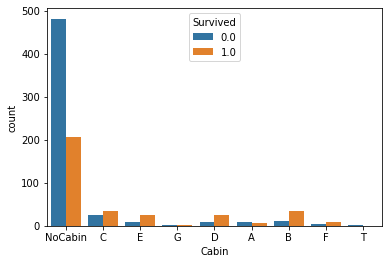

In [298]:
sns.countplot(data['Cabin'], hue=data['Survived'])

In [242]:
data.groupby('Cabin')['Survived'].value_counts()

Cabin    Survived
A        0.0           8
         1.0           7
B        1.0          35
         0.0          12
C        1.0          35
         0.0          24
D        1.0          25
         0.0           8
E        1.0          24
         0.0           8
F        1.0           8
         0.0           5
G        0.0           2
         1.0           2
NoCabin  0.0         481
         1.0         206
T        0.0           1
Name: Survived, dtype: int64

方法1結論: NoCabin的死亡率較高

### 方法2.看Cabin和其他變數關係進行補值

In [243]:
data[['Cabin','Survived']].groupby('Cabin').mean().sort_values(by='Survived',ascending=False)

,Survived
Cabin,
D,0.757576
E,0.750000
B,0.744681
F,0.615385
C,0.593220
G,0.500000
A,0.466667
NoCabin,0.299854
T,0.000000


In [244]:
data.Cabin[data['Cabin']=='NoCabin']="T"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [245]:
data['Cabin'].value_counts()

T    1015
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: Cabin, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


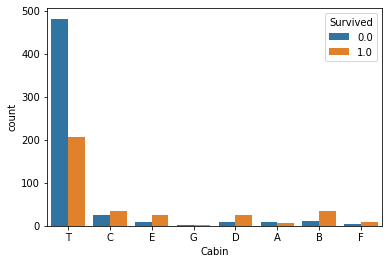

In [246]:
sns.countplot(data['Cabin'], hue=data['Survived'])

方法2結論:T比例與Cabin相近，用T補值

### 3.遺失值太多，若對分析無重大影響，cabin欄位直接捨去不用

In [106]:
del data['Cabin']
data.info()

## 二、處理Age欄位，為數值欄位
方法擇1使用

1.補0

2.用平均值補值

3.由前往後補植

4.由後往前補

5.遺失值太多，直接捨去不用

### 1.補 0 

29.881137667304014
14.413493211271334


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


23.87751718869366
17.590844644704124


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


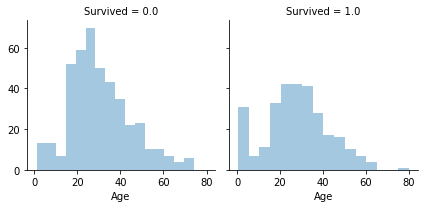

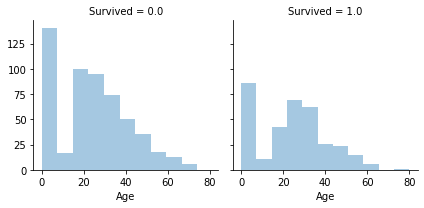

In [280]:
# 我們以  Age 為例，進行補植，補固定值
#補值前 平均值
print(data['Age'].mean()) #age平均
print(data['Age'].std()) #age標準差
# 連續型用分布圖行來看
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

#補值後
data['Age']=data['Age'].fillna(0)
print(data['Age'].mean())
print(data['Age'].std()) #age標準差
data[data['Age'].isnull().values==True]
#補完就沒有遺失值了，但是看到這樣的補值效果，平均值上有很明顯的差異，
# 連續型用分布圖行來看
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

可以看出死亡族群，年齡遺失的比例比較高

用0 來補不是一個好的策略

### 2.用平均值補值

29.881137667304014
14.413493211271334


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


29.881137667303985
12.883193243702001


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


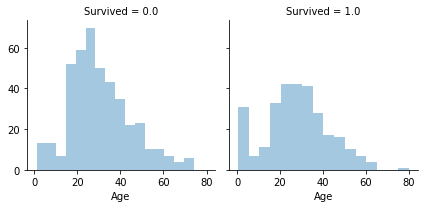

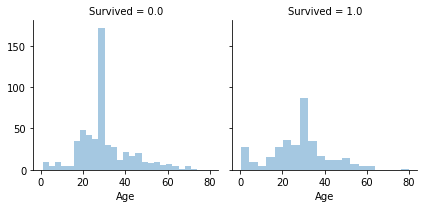

In [283]:
#補值前 平均值
print(data['Age'].mean())
print(data['Age'].std()) #age標準差
# 連續型用分布圖行來看
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Age', kde=False)
#補值後
data['Age']=data['Age'].fillna(data['Age'].mean())
print(data['Age'].mean())
print(data['Age'].std()) #age標準差
data[data['Age'].isnull().values==True]
#補平均數，平均數上沒有差異性，標準差接近
# 連續型用分布圖行來看
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

圖形中高點的位置，就是平均數的位置，特別突出也不太建議

### 3.由前往後補植

29.881137667304014
14.413493211271334


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


29.88771996939556
14.48476368019123


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


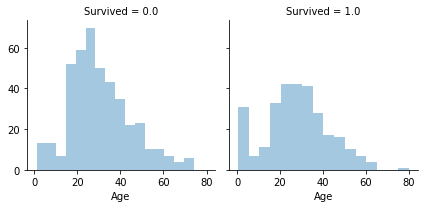

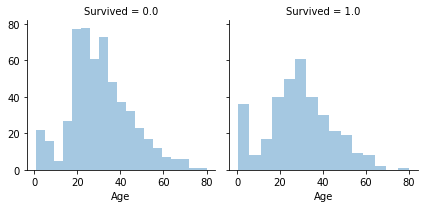

In [286]:
#補值前 平均值
print(data['Age'].mean())
print(data['Age'].std()) #age標準差
# 連續型用分布圖行來看
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Age', kde=False)
#補值後
data['Age']=data['Age'].fillna(method='bfill')
print(data['Age'].mean())
print(data['Age'].std()) #age標準差
data[data['Age'].isnull().values==True]
#補平均數，平均數上沒有差異性，標準差接近
# 連續型用分布圖行來看
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

### 4.由後往前補

29.881137667304014
14.413493211271334


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


29.75509549274255
14.347469886198386


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


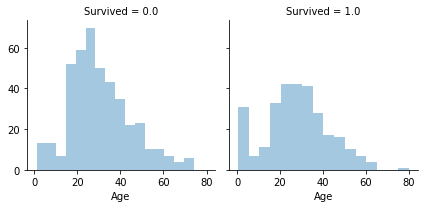

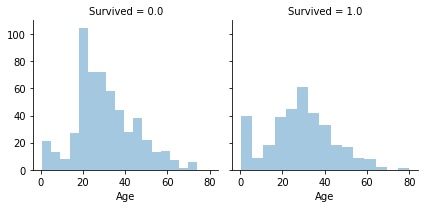

In [299]:
#補值前 平均值
print(data['Age'].mean())
print(data['Age'].std()) #age標準差
# 連續型用分布圖行來看
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Age', kde=False)
#補值後
data['Age']=data['Age'].fillna(method='pad')
print(data['Age'].mean())
print(data['Age'].std()) #age標準差
data[data['Age'].isnull().values==True]
#補平均數，平均數上沒有差異性，標準差接近
# 連續型用分布圖行來看
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

### 5.遺失值太多，列捨去不用

In [291]:
data['Age'].dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


## 三、Fare欄位，為數值欄位

In [300]:
data[data['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NoCabin,S


In [301]:
#不同艙等不同票價
data[data['Pclass']==1].mean(),data[data['Pclass']==2].mean(),data[data['Pclass']==3].mean()

(PassengerId    672.492260
 Survived         0.629630
 Pclass           1.000000
 Age             37.788978
 SibSp            0.436533
 Parch            0.365325
 Fare            87.508992
 dtype: float64, PassengerId    671.566787
 Survived         0.472826
 Pclass           2.000000
 Age             29.318592
 SibSp            0.393502
 Parch            0.368231
 Fare            21.179196
 dtype: float64, PassengerId    640.558533
 Survived         0.242363
 Pclass           3.000000
 Age             26.265628
 SibSp            0.568406
 Parch            0.400564
 Fare            13.302889
 dtype: float64)

In [302]:
print("Pclass=3,Fare平均值:",data[data['Pclass']==3].Fare.mean())
print("Pclass=3,Fare眾數:",data[data['Pclass']==3].Fare.mode())
print("Pclass=3,Fare中位數:",data[data['Pclass']==3].Fare.median())

Pclass=3,Fare平均值: 13.302888700564969
Pclass=3,Fare眾數: 0    8.05
dtype: float64
Pclass=3,Fare中位數: 8.05


In [303]:
#使用8.05填Fare空值
data.Fare[data['Fare'].isnull()]=8.05

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## 四、處理Embarked欄位，為類別欄位

In [304]:
data['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [305]:
#使用最多數量的"S"，填補Embarked空值
data.Embarked[data['Embarked'].isnull()]="S"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## 五、以上空值都填補完，再最後處理Survived欄位，為0,1數值

In [306]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 172.9+ KB


In [307]:
#survived 因為要預測值，有缺值，即捨棄不用
data.dropna(inplace=True)

In [308]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 90.5+ KB
